In [1]:
import kagglehub
import os
import shutil

# 从kaggle上下载数据集（猫狗图片）
download_path = kagglehub.dataset_download("mattop/ai-cat-and-dog-images-dalle-mini", force_download=True)
print("Path to download dataset files:", download_path)

# 将数据集移到工作目录
data_path = "../data"
if os.path.exists(data_path):
    shutil.rmtree(data_path)
os.mkdir(data_path)

for folders in os.listdir(download_path):
    source = os.path.join(download_path, folders)
    dest = os.path.join(data_path, folders)
    os.rename(source, dest)

d:\Envs\Anaconda3\envs\gpuPytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.23M/3.23M [00:01<00:00, 2.69MB/s]

Extracting files...


Path to download dataset files: C:\Users\charles0618\.cache\kagglehub\datasets\mattop\ai-cat-and-dog-images-dalle-mini\versions\2


In [2]:
import numpy as np
import requests

def get_image_feature(img_path, api_url):
    """ 抽取图片的特征向量 """
    files = {"image": open(img_path, "rb")}
    r = requests.post(api_url, files=files)
    r_dict = r.json()
    return np.array(r_dict['embedding'])

In [6]:
import random

# 获取猫猫狗狗的图片路径
dogs_path = '../data/DogsCats/Dogs'
cats_path = '../data/DogsCats/Cats'
img_paths = []
folders = [dogs_path, cats_path]

for folder in folders:
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        img_paths.append(file_path)

random.shuffle(img_paths)  # 打乱图片路径

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import math


def display_images(img_paths):
    """ 展示一组图片 """
    num_images = len(img_paths)
    num_cols = math.ceil(math.sqrt(num_images))
    num_rows = math.ceil(num_images / num_cols)  
    
    fig, axes = plt.subplots(
        num_rows, num_cols, figsize=(num_cols, num_rows))
    axes = axes.flatten()

    for i, img_path in enumerate(img_paths):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

本实验所用的图片数据集如下（猫狗顺序已打乱）：

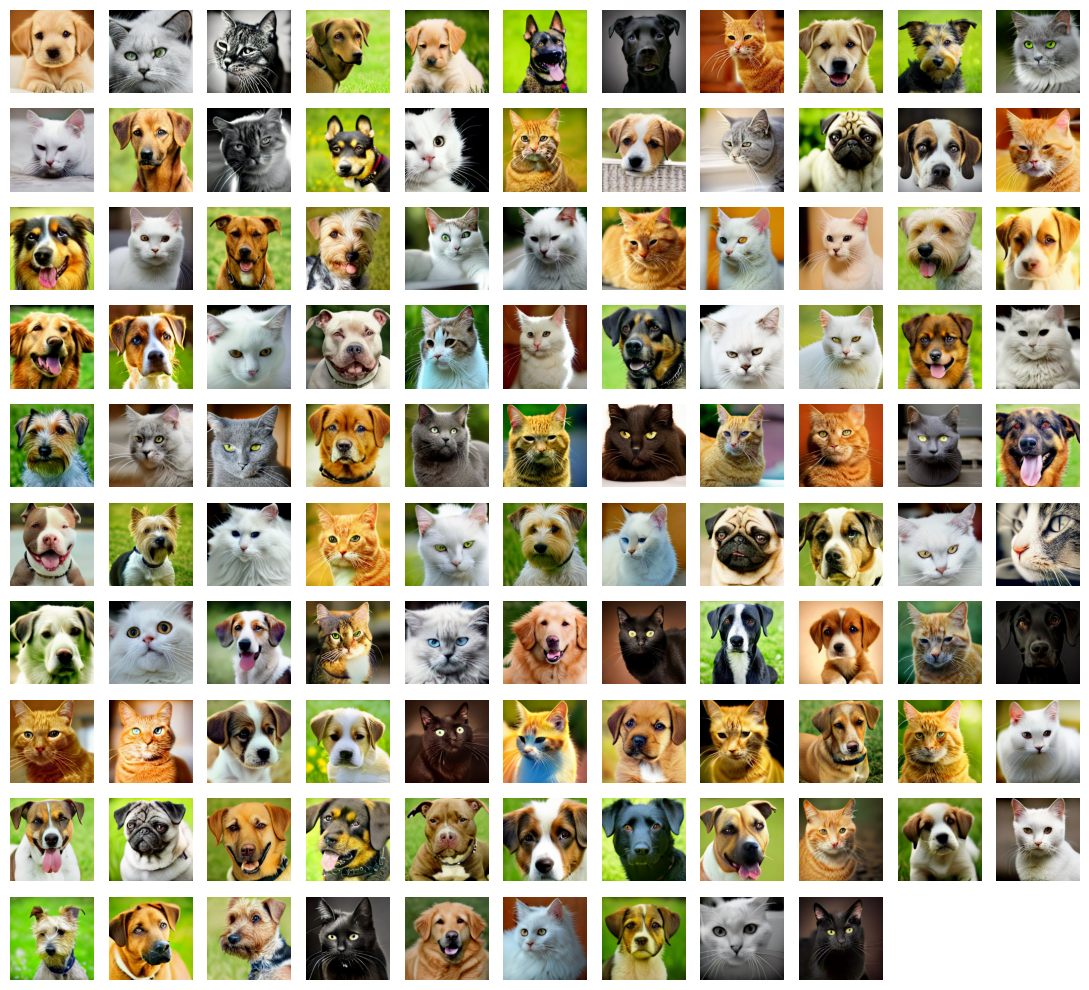

In [8]:
display_images(img_paths)

In [9]:
# 抽取这些图片的特征向量
url = "http://bl.mmd.ac.cn:8889/image_query"
features = []
for i, img_path in enumerate(img_paths):
    feature = get_image_feature(img_path, url)
    features.append(feature)
    print(f"Get feature of image[{i + 1}/{len(img_paths)}]")

Get feature of image[1/108]
Get feature of image[2/108]
Get feature of image[3/108]
Get feature of image[4/108]
Get feature of image[5/108]
Get feature of image[6/108]
Get feature of image[7/108]
Get feature of image[8/108]
Get feature of image[9/108]
Get feature of image[10/108]
Get feature of image[11/108]
Get feature of image[12/108]
Get feature of image[13/108]
Get feature of image[14/108]
Get feature of image[15/108]
Get feature of image[16/108]
Get feature of image[17/108]
Get feature of image[18/108]
Get feature of image[19/108]
Get feature of image[20/108]
Get feature of image[21/108]
Get feature of image[22/108]
Get feature of image[23/108]
Get feature of image[24/108]
Get feature of image[25/108]
Get feature of image[26/108]
Get feature of image[27/108]
Get feature of image[28/108]
Get feature of image[29/108]
Get feature of image[30/108]
Get feature of image[31/108]
Get feature of image[32/108]
Get feature of image[33/108]
Get feature of image[34/108]
Get feature of image[35

In [10]:
def k_means(points, k, epsilon=1e-4, max_iteration=100):
    """ k-means聚类 
    Args:
        points (any): 待聚类的点
        k (int): 分类数目
        epsilon (float): 质心收敛的阈值
        max_iteration (int): 最大迭代次数
    Returns:
        labels (np.ndarray): 聚类得出的points的标签
        centors (list): 各聚类的中心
    """
    n = len(points)
    labels = np.zeros(n, dtype=int)  # 各点的标签
    centors = []  # 质心

    # 随机初始化质心
    centor_ids = [random.randint(0, n) for _ in range(k)]
    for i in range(k):
        centor_id = centor_ids[i]
        centors.append(points[centor_id])
        labels[centor_id] = i
    
    for it in range(max_iteration):
        # 计算其他各点到质心的距离
        for i, point in enumerate(points):
            min_dist = float('inf')
            for j, centor in enumerate(centors):
                dist = np.linalg.norm(point - centor)
                # 某点到新质心的距离更近，则更新其标签
                if dist < min_dist:
                    min_dist = dist
                    labels[i] = j

        # 更新质心
        point_counts = np.zeros(k)  # 每个聚类里面点的个数
        cluster_sum = np.zeros((k, len(points[0])))  # 每个聚类中的点求和
        for i, point in enumerate(points):
            label = labels[i]
            point_counts[label] += 1
            cluster_sum[label] += point
        
        converged = True  # 质心是否收敛
        for i in range(k):
            new_centor = cluster_sum[i] / point_counts[i]  # 计算新质心
            if np.linalg.norm(new_centor - centors[i]) >= epsilon:
                # 质心未收敛，继续更新
                converged = False
                centors[i] = new_centor 
        
        if converged:
            print(f"iteration: {it}")
            break
    
    return labels, centors

In [11]:
labels, centors = k_means(features, 2)
labels, centors

iteration: 1


(array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]),
 [array([ 0.01684989,  0.03245617,  0.01968812, ..., -0.01517041,
          0.02026007,  0.00191991]),
  array([ 0.03143636,  0.0476541 ,  0.02150665, ..., -0.03571233,
         -0.00026189,  0.00477927])])

In [12]:
# 按照kmeans得到的标签将打乱的图片重新分类
cluster1_paths = []
cluster2_paths = []
for i, label in enumerate(labels):
    if label == 1:
        cluster1_paths.append(img_paths[i])
    else:
        cluster2_paths.append(img_paths[i])

根据聚类结果，分成 `cluster1` 和 `cluster2` 两簇，将对应的图片展示如下，可以看出，成功将猫狗分辨出来：

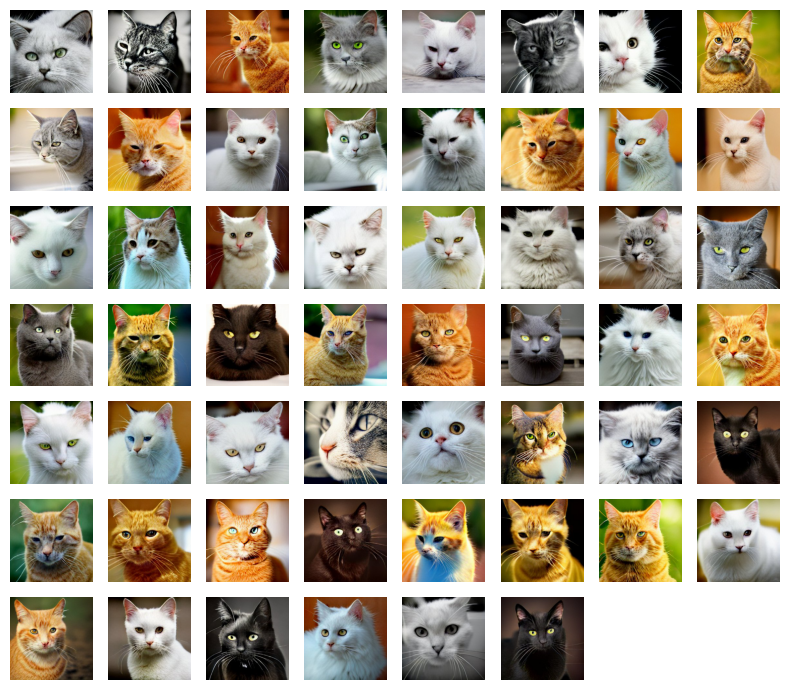

In [13]:
display_images(cluster1_paths)

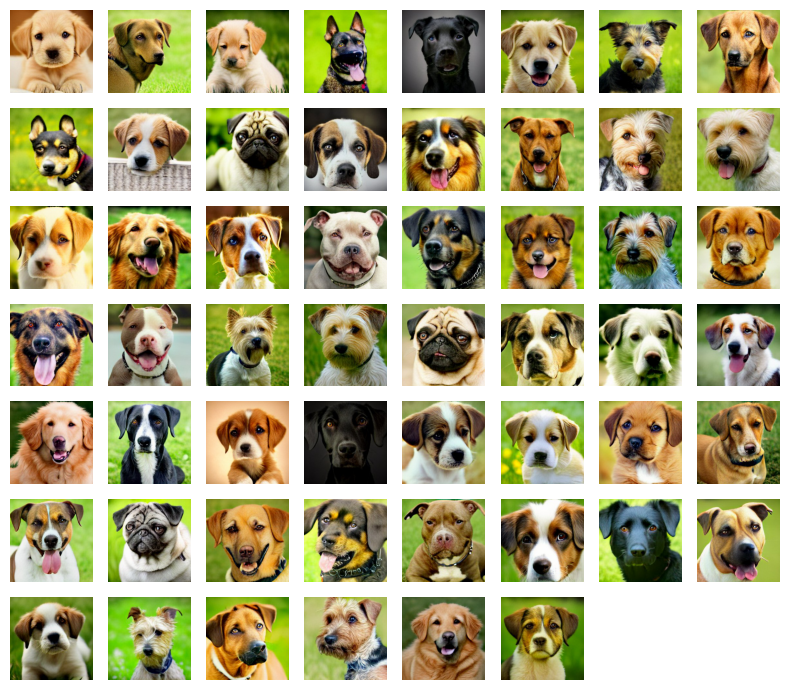

In [14]:
display_images(cluster2_paths)

经PCA将特征向量降为2维后，用散点图将聚类结果可视化：

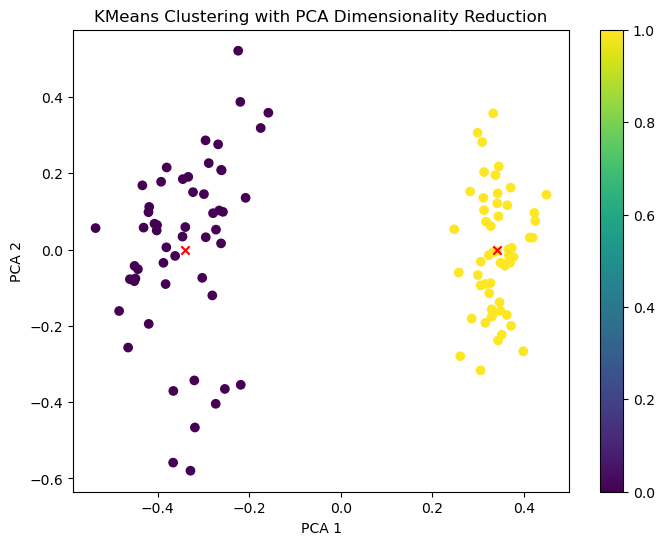

In [31]:
from sklearn.decomposition import PCA

# 使用PCA将高维数据降到2维
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)
reduced_centors = pca.fit_transform(centors)

# 可视化
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            c=labels, cmap='viridis', marker='o')
plt.scatter(reduced_centors[:, 0], reduced_centors[:, 1], color='red', marker='x')
plt.title('KMeans Clustering with PCA Dimensionality Reduction')
plt.xlabel('PCA 1')

plt.ylabel('PCA 2')
plt.colorbar() 
plt.show()